### This notebook aims to predict whether a product is a failure or not based on some measurement,attribute and loading variables. The dataset was used in Kaggle Tabular _Playgorund Series-August22_ . The dataset can be found [here](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/data?select=train.csv)

# Importing Libraries 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore,Back,Style 
import scipy.stats
import warnings


# Loading the Dataset

In [70]:
train = pd.read_csv('train.csv',index_col='id')
test = pd.read_csv('test.csv',index_col='id')
display(train)
display(test)

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,I,144.74,material_7,material_5,9,5,0,4,9,18.465,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
47341,I,74.53,material_7,material_5,9,5,4,8,7,18.900,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
47342,I,67.73,material_7,material_5,9,5,10,11,2,18.656,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349


In [5]:
both = pd.concat([train[test.columns],test])

## Target Column

In [6]:
print(train['failure'].value_counts()/len(train))

0    0.787392
1    0.212608
Name: failure, dtype: float64


We can see that the target column is a bit unbalanced as 79 products are good and 21 are not. To in this case _Stratified Cross Validation_ will be used.

## Float columns

The dataset consists of 16 float columns. All the columns have missing values (up to 10%)

**Insight:** We'll need to impute the missing values (unless we use a classifier which deals with missing values automatically). The simplest solution is filling the missing values with the columns's mean, but this simple solution won't be effective. A more dophisticatec solution might use the imputers from [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) or even some customization imputation scheme

In [13]:
float_cols = [f for f in train.columns if train[f].dtype == float]
# float_col = [f for f in train.select_dtypes('float')]  #provides similar result 

In [20]:
pd.concat([train[float_cols].isnull().sum().rename('missing values in train'), test[float_cols].isnull().sum().rename('missing values in test')], axis=1)

,missing values in train,missing values in test
loading,250,223
measurement_3,381,329
measurement_4,538,409
measurement_5,676,508
measurement_6,796,624
measurement_7,937,720
measurement_8,1048,846
measurement_9,1227,904
measurement_10,1300,1067
measurement_11,1468,1136


In [42]:
print(f"{both[float_cols].isna().any(axis=1).sum()/len(both):.0%}")

54%


**Insight:** As there's over 50% of samples with missing values, the aim will be to impute effectively. 


The histogram of the float features are given below. 

Text(0.5, 1.04, 'Train and test distributions of the continuous features')

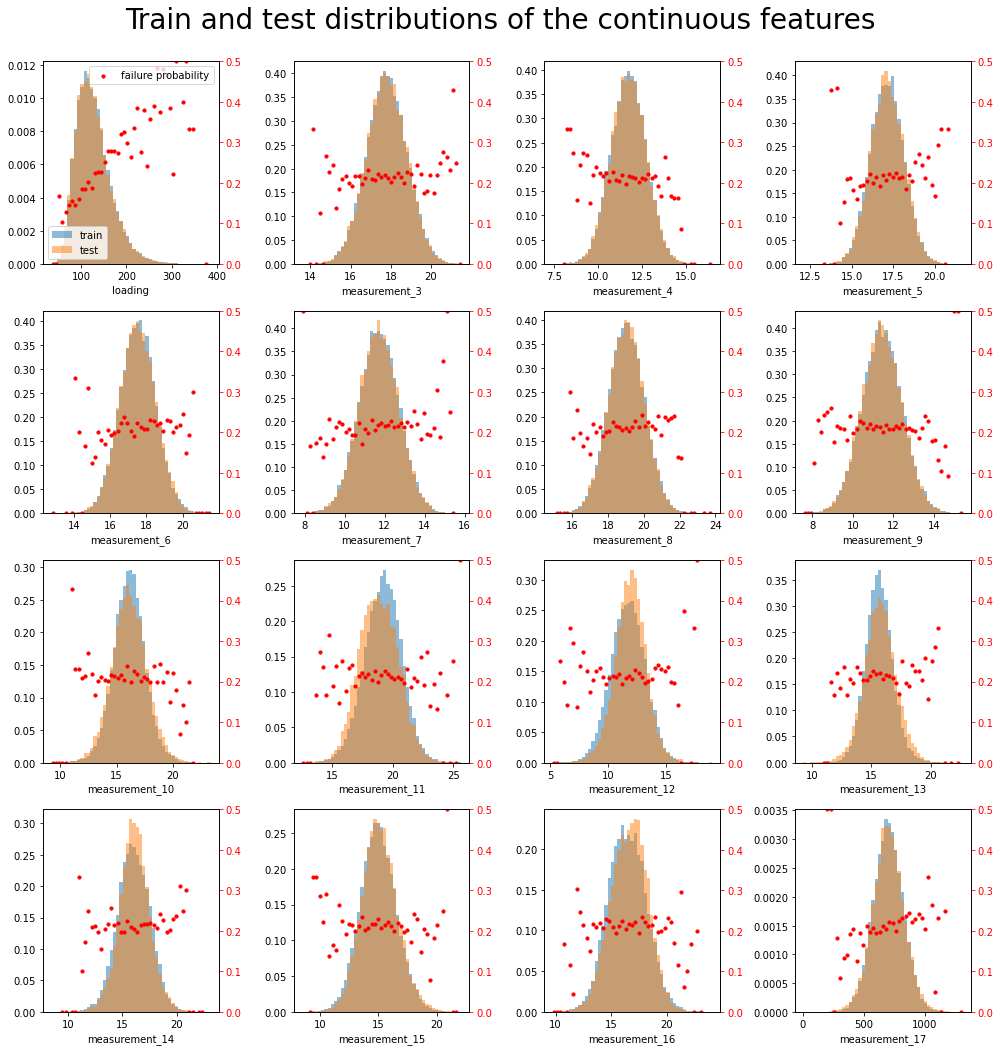

In [63]:
_, axs = plt.subplots(4,4, figsize=(14,14))
for f, ax in zip(float_cols, axs.ravel()):
    mi = min(train[f].min(), test[f].min())
    ma = max(train[f].max(), test[f].max())
    bins = np.linspace(mi,ma,50)
    ax.hist(train[f], bins=bins, alpha = 0.5, density=True, label='train')
    ax.hist(test[f], bins=bins, alpha = 0.5, density=True, label='test')
    ax.set_xlabel(f)
    if ax == axs[0,0]: ax.legend(loc='lower left')

    ax2 = ax.twinx()
    total, _ = np.histogram(train[f], bins=bins)
    failures,_ = np.histogram(train[f][train.failure==1], bins=bins)
    with warnings.catch_warnings(): # ignore dividew by zero for empty bins
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        ax2.scatter((bins[1:] + bins[:-1]) / 2, failures/total,
                    color='r', s=10, label='failure probability')

    ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='r')
    if ax == axs[0,0]: ax2.legend(loc='upper right')
plt.tight_layout(w_pad =1)
plt.suptitle("Train and test distributions of the continuous features", fontsize = 28, y=1.04)

From the histograms we can see that the histogram of *loading* is a bit skewed on the left. This means the distribution seems like a log normal distribution. Where as all the other distributions are normal distributions. In the first 8 distributions the train and test distributions are aligned. Where as the other distributions differ slightly.

The magenta dots present the probability of failures. The first diagram shows a clear positive correlation between *loadings* and failure porbability. Same goes for *measurement_17*. Where as it's unclear what is the exact relation between the features and target from the other diagrams. 

**Insight:** 
- Maybe we can apply a log-transformation to the loading to make the distribution more symmetric.
- As the measurements are uncorrelated to the failure probability, they are useless for a linear classifier. We need more complex classifiers which can deal with feature interactions (decision trees, neural networks, ...) - or good feature engineering.

## Integer Columns

In [83]:
int_cols = [i for i in train.columns if train[i].dtype== 'int64' and i != 'failure']
pd.concat([train[int_cols].isna().sum().rename('missing values for train'),test[int_cols].isna().sum().rename('missing values for test')],axis=1)

,missing values for train,missing values for test
attribute_2,0,0
attribute_3,0,0
measurement_0,0,0
measurement_1,0,0
measurement_2,0,0


In [93]:
train.failure.groupby(train['measurement_0']).agg(['mean', 'count'])

,mean,count
measurement_0,,
0,0.184015,538
1,0.216521,799
2,0.219920,1255
3,0.198139,1827
4,0.213596,2280
5,0.212379,2585
6,0.218040,2816
7,0.215520,2719
8,0.207163,2457


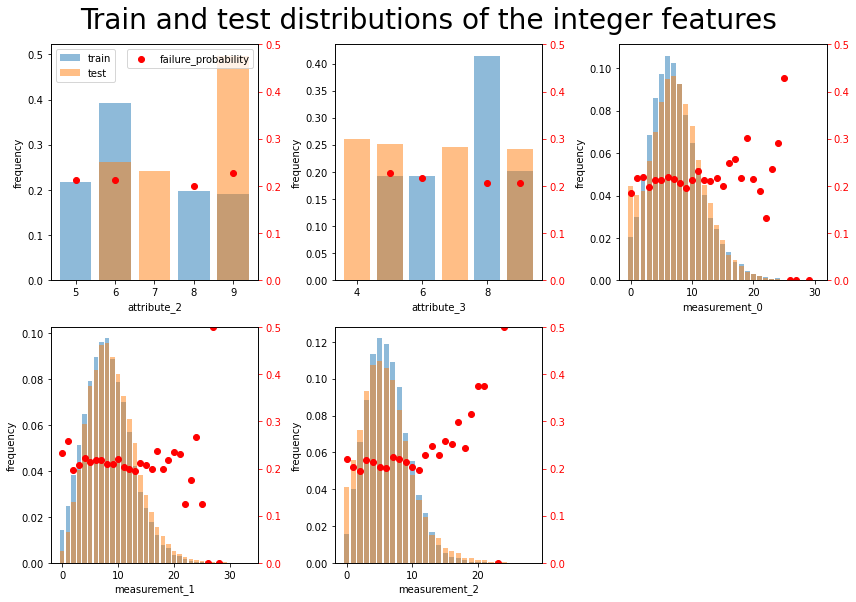

In [100]:
_,axs = plt.subplots(2,3,figsize=(12,8))
for i,ax in zip(int_cols,axs.ravel()):
    temp1 = train.failure.groupby(train[i]).agg(['mean', 'count'])
    ax.bar(temp1.index, temp1['count']/len(train), alpha=0.5,label='train')
    temp2 = test[i].value_counts()
    ax.bar(temp2.index,temp2/len(test),alpha=0.5,label='test')
    ax.set_xlabel(i)
    ax.set_ylabel('frequency')

    ax2 = ax.twinx()
    ax2.scatter(temp1.index,temp1['mean'],
                color = 'r', label='failure_probability')
    ax2.set_ylim(0,0.5)
    ax2.tick_params(axis='y',colors='r')
    if ax == axs[0,0]: ax2.legend(loc = 'upper right')

axs[0, 0].legend()
axs[1,2].axis('off')
plt.tight_layout(w_pad=1)
plt.suptitle("Train and test distributions of the integer features", fontsize=28, y = 1.04)
del temp1,temp2

_attribute_2_ and _attribute_3_ both have some unique values compares to train and test. For instance value (5),value(8) are in train and value(7) in test for _attribute_2_ . Similarly 6,8 are in train and 4,7 on test for _attribute_3_ . Aside from measurement_2 , none of them show a correlation between target and features. 

**Insights:**

- The two attributes could be categorical features. Perhaps we should one-hot encode them and make sure that our classifier can deal with the values which occur only in test.
- As measurement_2 is correlated to the target only for values above 10, linear classifiers will profit if we clip all values below 10.
- Again, most features are uncorrelated to the failure probability. If a linear classifier wins this competition, it will win only with very good feature engineering.

## String columns

There are 3 string columns and none of them contain missing values. 

In [104]:
str_cols = [s for s in train.select_dtypes('object')]
pd.concat([train[str_cols].isna().sum().rename('missing values for train'),test[str_cols].isna().sum().rename('missing values for test')],axis=1)

,missing values for train,missing values for test
product_code,0,0
attribute_0,0,0
attribute_1,0,0
